The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


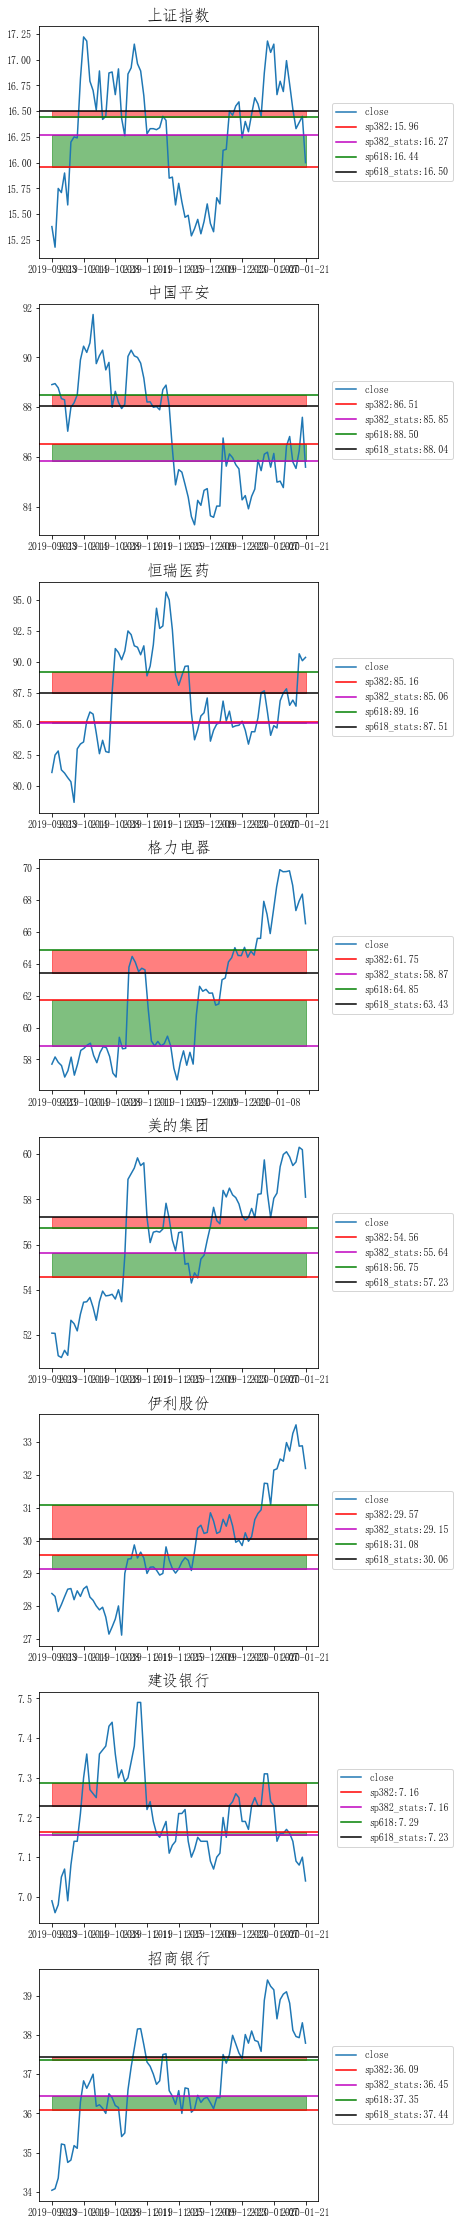

In [3]:
%load_ext autoreload
%autoreload 1
%aimport plot_golden
import importlib
import numpy as np
import pandas as pd

importlib.reload(plot_golden)

input = pd.DataFrame(np.array([
    ['上证指数', '000001'], 
    ['中国平安', '601318'],
    ['恒瑞医药', '600276'],
    ['格力电器', '000651'],
    ['美的集团', '000333'],
    ['伊利股份', '600887'],
    ['建设银行', '601939'],
    ['招商银行', '600036']]),
                    columns=['name', 'code'])


plot_golden.plot_golden(input, 120)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


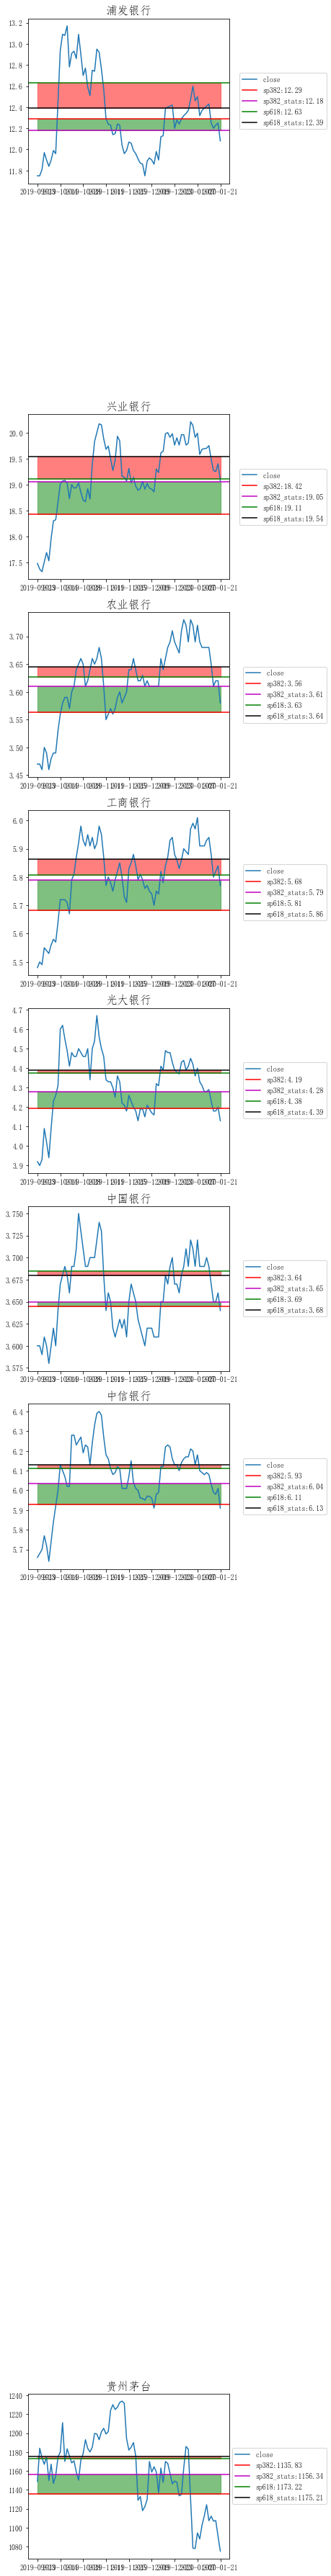

In [5]:
%load_ext autoreload
%autoreload 1
%aimport plot_golden
import importlib
import numpy as np
import pandas as pd

importlib.reload(plot_golden)

input = pd.DataFrame(np.array([
         ['民生银行', '600016'], 
         ['兴业银行', '601166'], 
         ['农业银行', '601288'], 
         ['工商银行', '601398'],
         ['光大银行', '601818'], 
         ['中信证券', '600030'], 
         ['招商证券', '600999'], 
         ['兴业证券', '601377'], 
         ['光大证券', '601788'],
         ['贵州茅台', '600519'],
         ['中国人寿', '601628'],
         ['中国建筑', '601668']
         ]),
                         columns=['name', 'code'])


plot_golden.plot_golden_for_option(input, 120)